In [285]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import cross_validation,ensemble,metrics
import pandas as pd
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [7]:
data = pd.read_csv('lenta-ru-news.csv')

In [98]:
data.head(1)

,url,title,text,topic,tags
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество


In [99]:
test_data = data.head(100)

In [96]:
def get_data(url):
    
    date = re.findall('\d\d\d\d\/\d\d\/\d\d', url)[0]
    date = datetime.strptime(date, '%Y/%m/%d')
    return date

In [101]:
test_data['date'] = test_data['url'].apply(get_data)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
test_data

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество,2018-12-14
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды,2018-12-15
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир,2018-12-15
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика,2018-12-15
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество,2018-12-15
5,https://lenta.ru/news/2018/12/15/sobor/,Архиепископ канонической УПЦ отказался прийти ...,Архиепископ канонической Украинской православн...,Бывший СССР,Украина,2018-12-15
6,https://lenta.ru/news/2018/12/15/skrepy/,Российскую молодежь предложили обучать духовны...,Российская молодежь лучше усвоит духовные ценн...,Интернет и СМИ,Coцсети,2018-12-15
7,https://lenta.ru/news/2018/12/15/skripal/,Полицейские из Солсбери описали одеревеневшего...,"Полицейские Алекс Коллинс и Трейси Холлоуэй, о...",Мир,Общество,2018-12-15
8,https://lenta.ru/news/2018/12/15/tu160/,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир,Политика,2018-12-15
9,https://lenta.ru/news/2018/12/15/zrk/,В Минобороны раскрыли многомиллионные хищения ...,Директора завода «Электроприбор» Муталиба Эмир...,Силовые структуры,Следствие и суд,2018-12-15


# Tfidf

In [116]:
test_data['title'].tail(2)

98       Новая прическа Мелании Трамп насмешила публику
99    Финляндия закрыла программу изучения русского ...
Name: title, dtype: object

In [119]:
vectorizer=TfidfVectorizer(analyzer='word',
                           stop_words=[],
                           lowercase=False,
                           ngram_range=(1, 2),
                           min_df=15
                           )

In [123]:
vectorizer.fit_transform(data['title'])

<739351x62308 sparse matrix of type '<class 'numpy.float64'>'
	with 5662735 stored elements in Compressed Sparse Row format>

In [126]:
features = list(vectorizer.get_feature_names())

In [133]:
# models_fin = [('regret',LogisticRegression(C=1.97,solver='liblinear'))]

In [323]:
model = LogisticRegression(C=1.97,solver='liblinear')
# model = xgb.XGBClassifier(base_score=0.1,learning_rate=0.1,n_estimators=140)
models = [('xgBoost',xgb.XGBClassifier(base_score=0.1,learning_rate=0.1,n_estimators=140)),('regret',LogisticRegression(C=1.97,solver='liblinear')),('tree',RandomForestClassifier(oob_score=True))]

In [ ]:
2+2

In [ ]:
X_train = data.tail(5000)['title']
X_train.fillna('undefined')
X_train_ve=vectorizer.fit_transform(X_train)
X_train_arr=X_train_ve.toarray()
X_test = data.head(1000)['title']
X_test_ve=vectorizer.transform(X_test)
X_test_arr=X_test_ve.toarray()

In [ ]:
y_train = data.tail(5000)['topic']
y_train.fillna('undefined')
y_train = np.array(y_train)
y_test = data.head(1000)['topic']
y_test = np.array(y_test)

In [ ]:
for name, model in models:
    print(name)
    model.fit(X_train_arr, y_train)
    result = model.predict( X_test_arr)

    print ('train - ',model.score(X_train_arr, y_train))
    print ('test - ',metrics.accuracy_score(y_test,result))
    print (metrics.classification_report (y_test,result))
    print (metrics.confusion_matrix (y_test,result))

xgBoost


In [312]:
features = list(vectorizer.get_feature_names())
mapFeat = dict(zip(["f"+str(i) for i in range(len(features))],features))
ts = pd.Series(model.get_booster().get_fscore())
ts.index = ts.reset_index()['index'].map(mapFeat)
ts.sort_values(ascending=True,inplace=True)
print(ts)

AttributeError: 'LogisticRegression' object has no attribute 'get_booster'

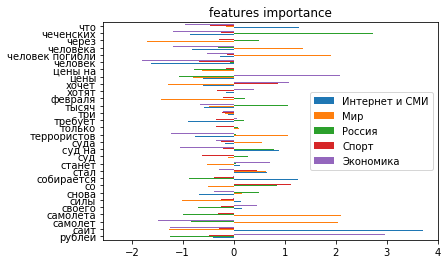

In [313]:
ts.tail(30).plot(kind="barh", title=("features importance"))

In [314]:
model.classes_

array(['Из жизни', 'Интернет и СМИ', 'Культура', 'Мир', 'Россия',
       'Силовые структуры', 'Спорт', 'Экономика'], dtype=object)

In [315]:
ts = pd.DataFrame(columns=model.classes_,data=np.transpose(model.coef_),index=vectorizer.get_feature_names())
ts

,Из жизни,Интернет и СМИ,Культура,Мир,Россия,Силовые структуры,Спорт,Экономика
000,-1.010366,2.449704,0.216426,-0.394390,0.315464,-0.003679,-0.599150,0.042874
10,-0.583216,0.142947,-0.382130,0.737994,-0.204905,-0.017974,0.000609,0.960230
10 лет,-0.963722,-0.685983,0.037727,0.797653,0.204660,-0.003451,-0.432380,0.373890
10 миллионов,0.392794,1.800019,0.926684,-0.877045,-0.625415,-0.001412,0.564064,-0.743952
10 тысяч,0.269002,-0.610411,0.701610,-0.063634,0.070749,-0.003031,0.172441,0.345699
10 человек,-0.146530,-0.165320,-0.182384,1.075280,-0.624010,-0.001951,-0.120694,-0.397015
100,-1.596646,0.162348,0.261857,0.129582,-0.169582,-0.014561,-0.544597,1.387839
100 миллионов,-0.350918,-0.237236,-0.149704,-0.280773,0.691922,-0.002602,-0.273612,0.304179
100 тысяч,-0.534719,-0.259418,-0.127582,0.453598,0.424503,-0.002660,0.124719,-0.231848
1000,-0.313252,1.230059,-0.821250,-0.181548,-1.447271,-0.001729,1.196844,1.004532


TypeError: Empty 'DataFrame': no numeric data to plot

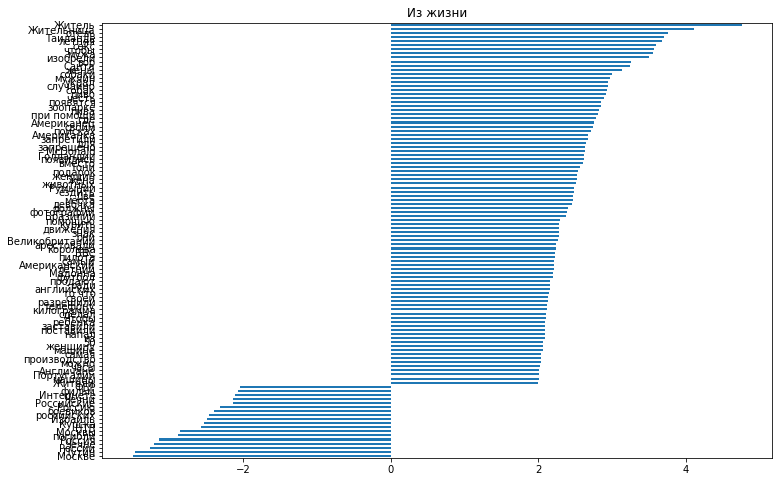

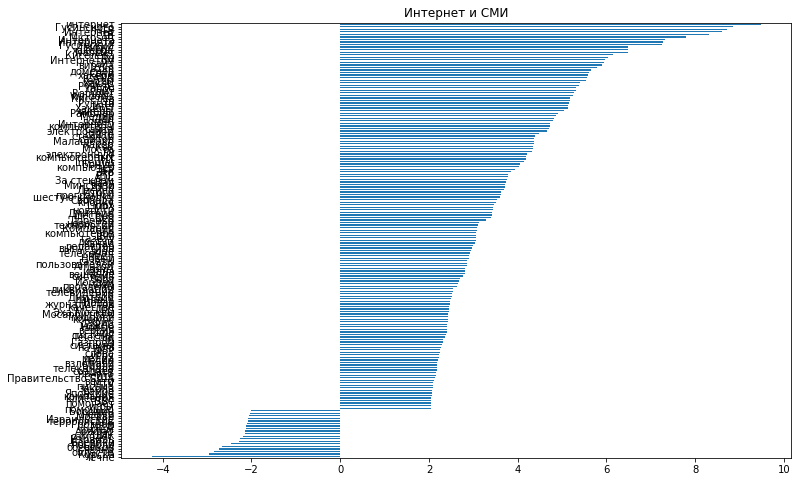

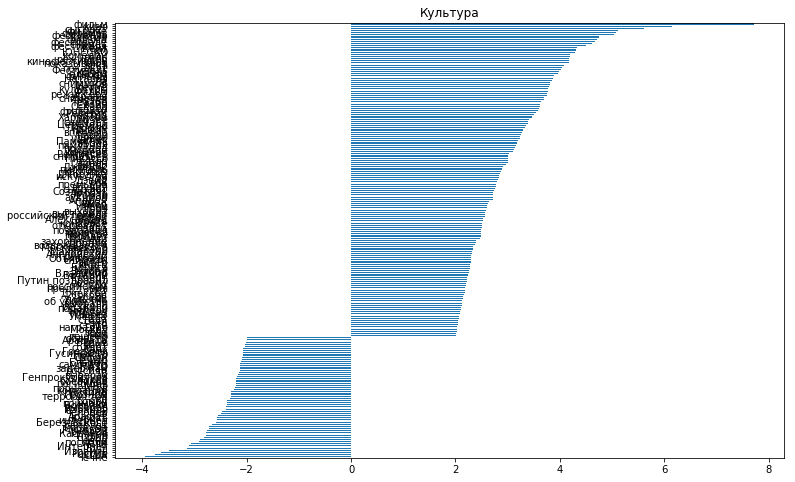

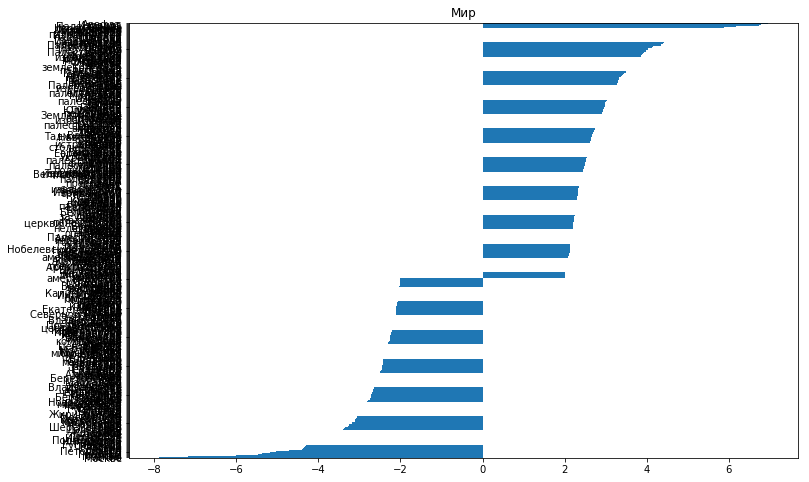

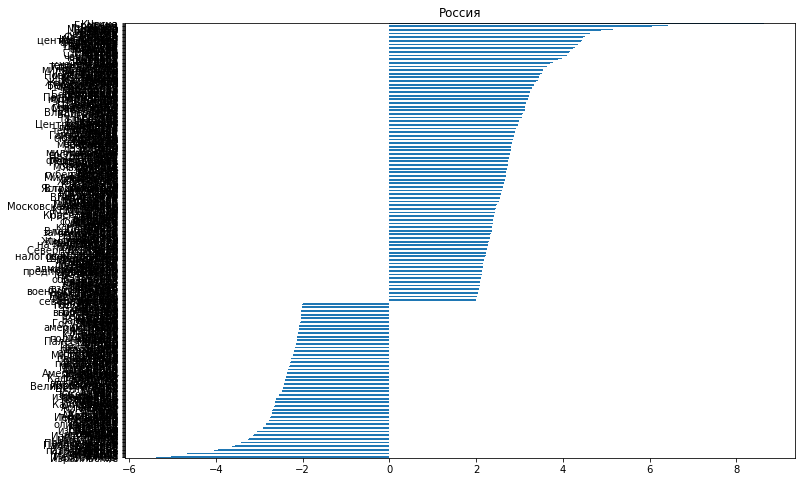

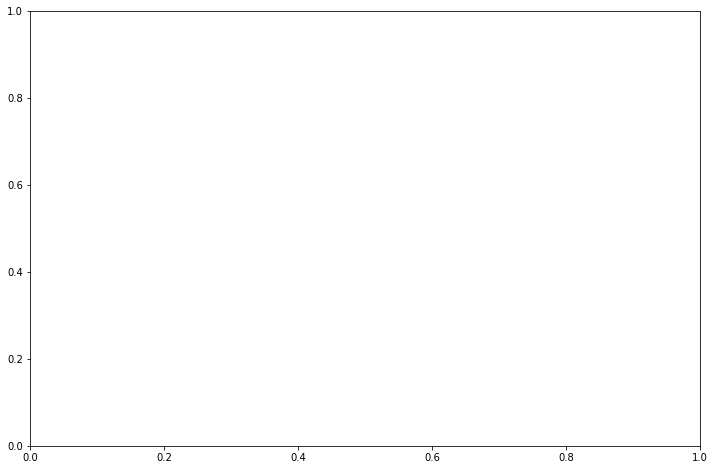

In [316]:
for c in ts.columns:
    plt.figure(figsize = (12, 8))
    ts[c][(ts[c] > 2) | (ts[c] < -2)].sort_values().plot(kind="barh", title=(c))

In [23]:
a = model(12, 234)

In [24]:
print(a)

MiniBatchKMeans(batch_size=100, compute_labels=True, init=234, init_size=None,
        max_iter=100, max_no_improvement=10, n_clusters=12, n_init=3,
        random_state=None, reassignment_ratio=0.01, tol=0.0, verbose=0)


# experiments

In [38]:
test_data.iloc[2,:]
# ['text']

url           https://lenta.ru/news/2018/12/15/disneyland/
title         Обнаружено самое счастливое место на планете
text     Сотрудники социальной сети Instagram проанализ...
topic                                          Путешествия
tags                                                   Мир
Name: 2, dtype: object